# Tutorial for the damped driven pendulum
This tutorial reproduces figures for the third example of the paper.

In [1]:
import sys
sys.path.append("./src/")
import numpy as np
import matplotlib.pyplot as plt
from pendulum_functions import *

# Solve for the autonomous system

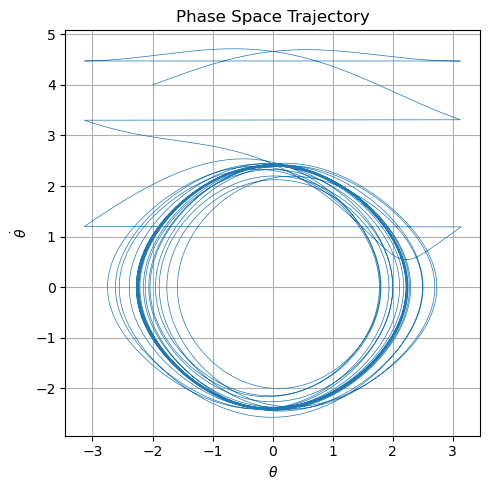

True
-2.2057187624641656 0.37276007301718306


In [2]:
divisor = 500
t_eval = np.arange(0, 2000, np.pi/divisor)

thetas, theta_dots = solve_pendulum(
    theta0=-2,
    v0=4,
    t_eval=t_eval,
    nu=0.1,
    omega=1.0,
    f=1.2,
    plot=True,
    truncating_factor=0
)

print(is_periodic_numba(pi_fraction=divisor, thetas = thetas))

# the fixed point
indexes = np.arange(0, len(thetas), 2*divisor)
print(thetas[indexes][-1], theta_dots[indexes][-1])

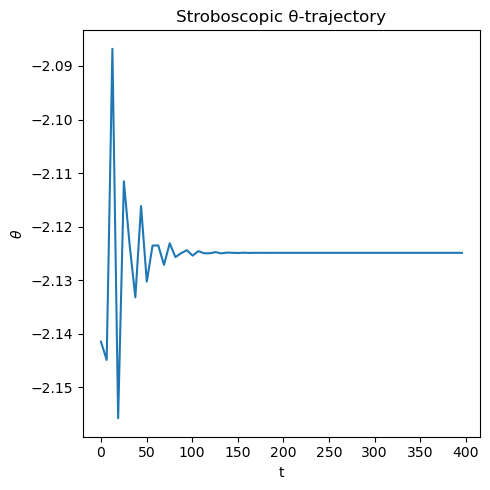

In [3]:
_ = get_stroboscopic_trajectory(ini_condition=[3, 0.9], omega=1.0, nu=0.1, f=1.2, t_max = 500, truncating_factor=0.2)


# Bifurcation plot

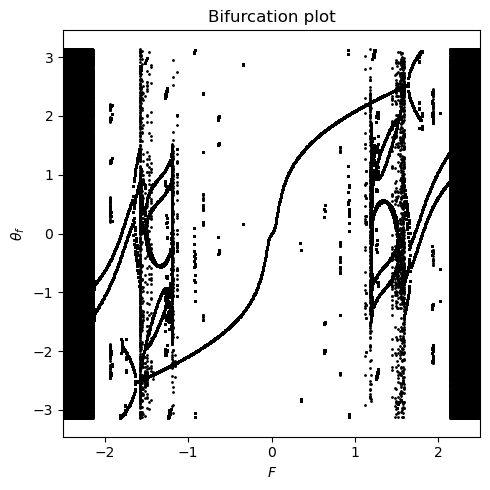

In [4]:
plot_bifurcation(samples = 100, fmin=-2.5, fmax=2.5, npts=1000)

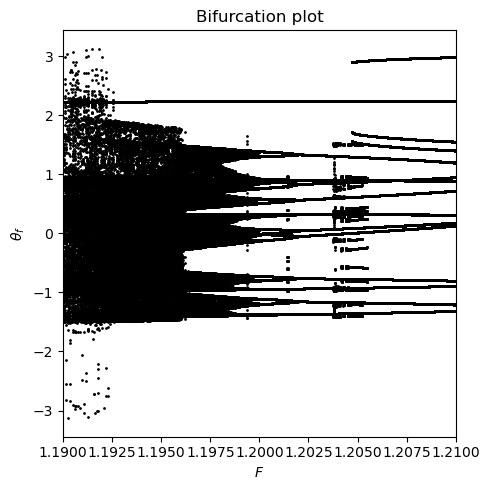

In [5]:
# zoom in
plot_bifurcation(samples = 10, fmin=1.19, fmax=1.21, npts=1000)

# Fractal 1
## Visualisation

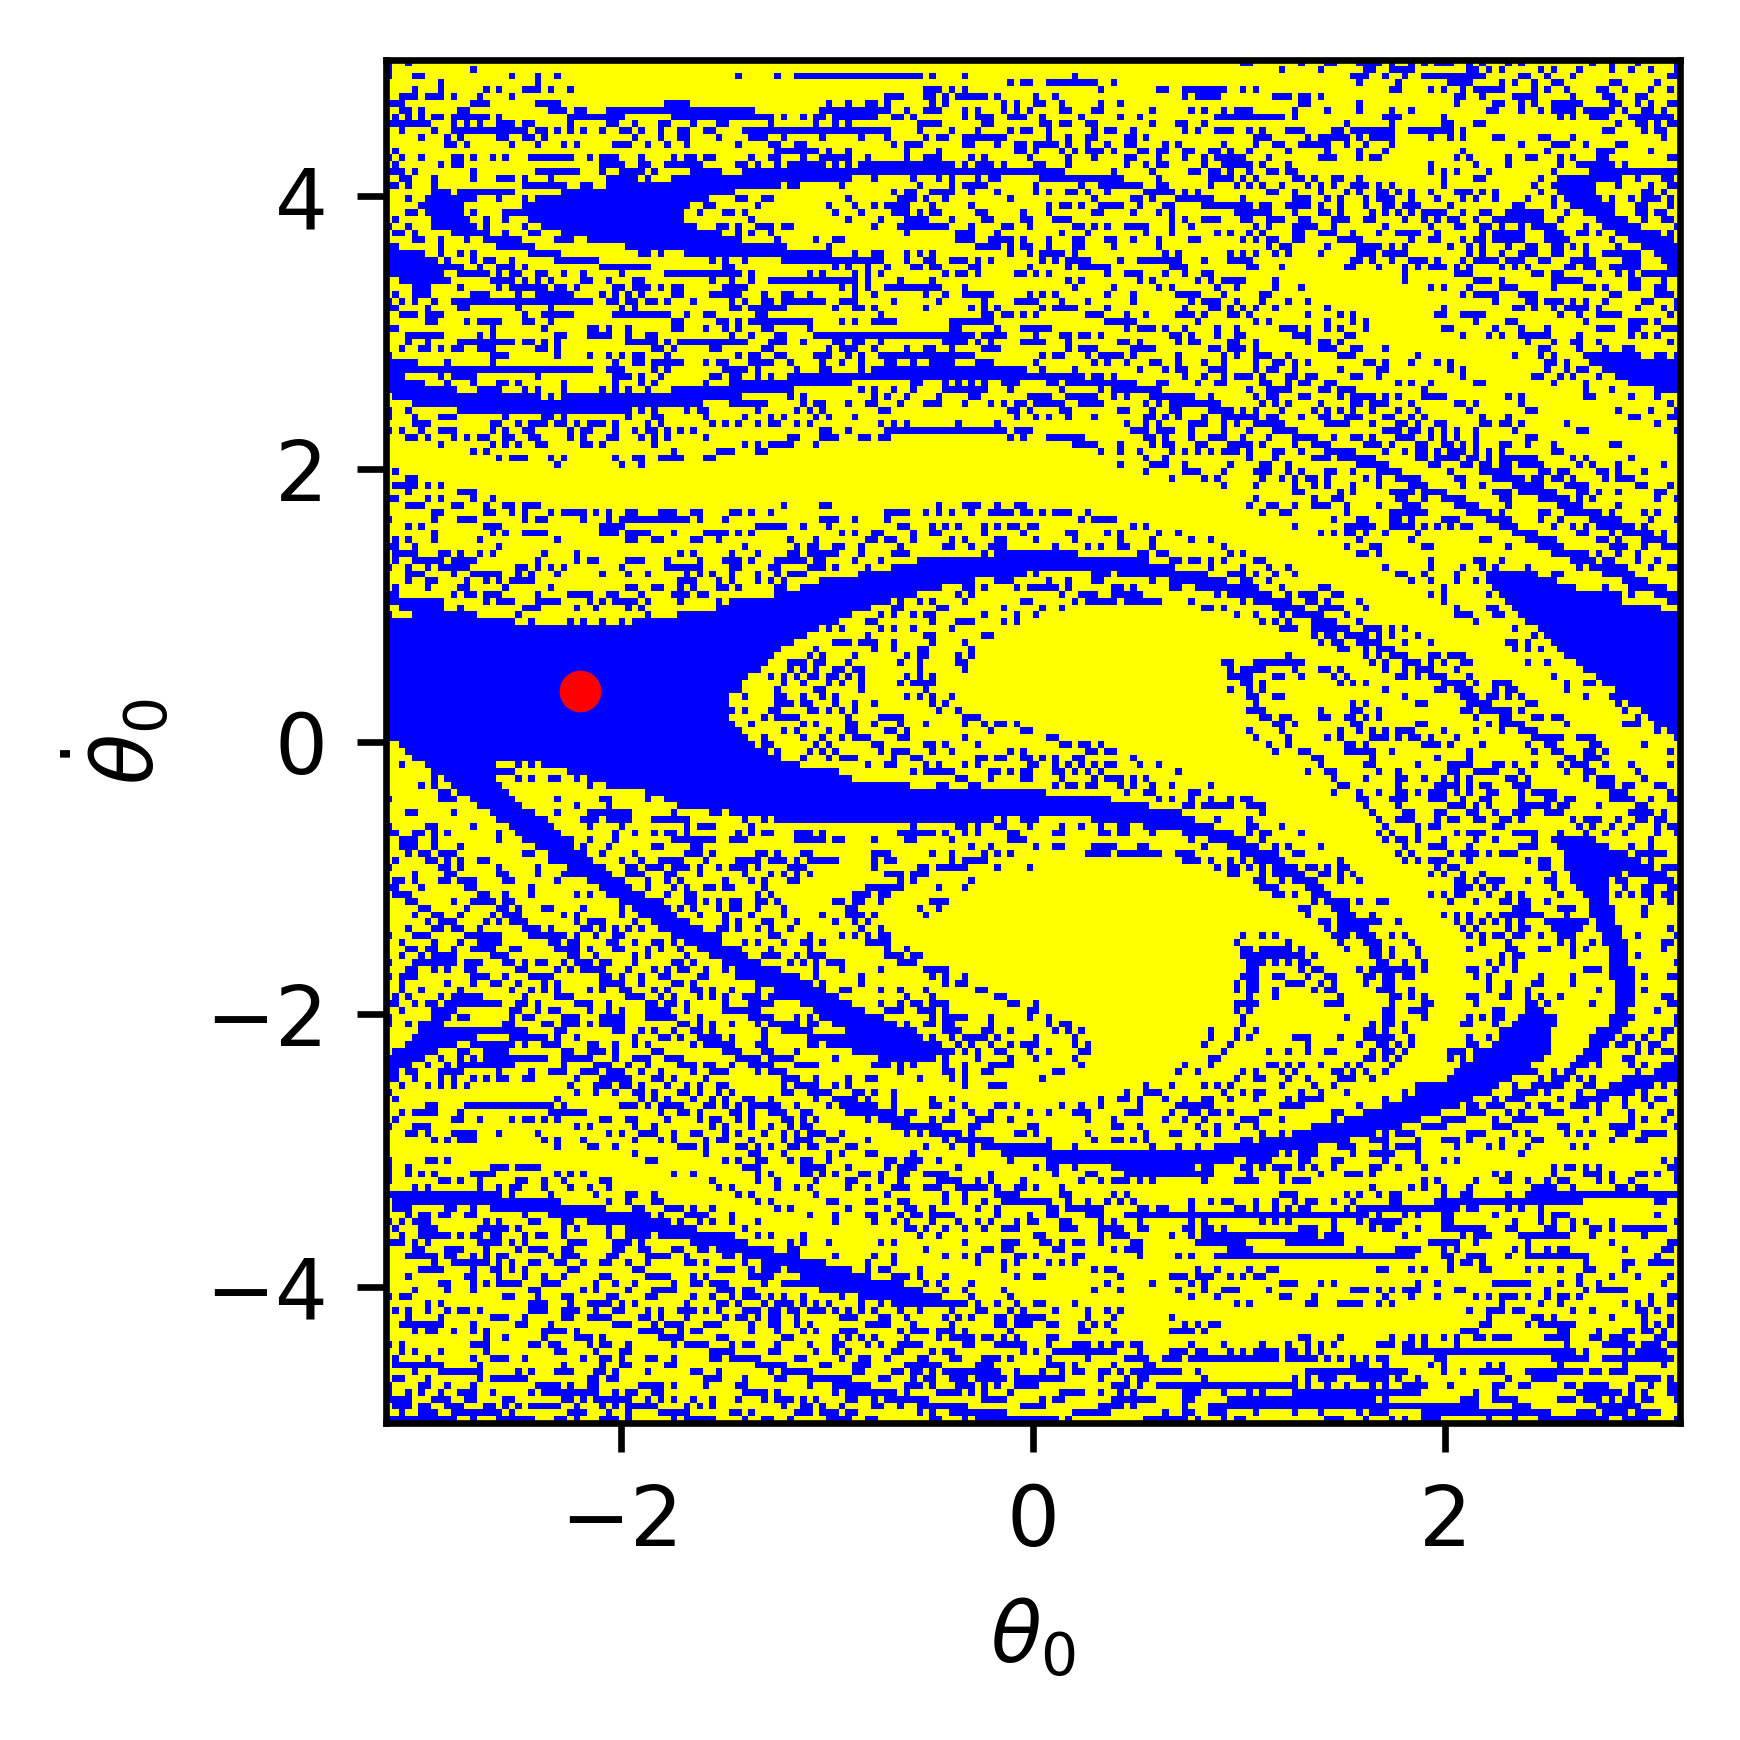

In [6]:
theta_vals, v_vals, mask = visualise_basin_numba(
    size=200, # paper parameter 1000
    omega=1.0,
    nu=0.1,
    f=1.195,
    divisor=200,
    t_max=500,
    theta_range=(-np.pi, np.pi),
    v_range=(-5, 5),
    dpi = 600,
    fig_size = (3,3),
    show = False
)

divisor = 200
t_eval = np.arange(0, 2000, np.pi/divisor)

thetas, theta_dots = solve_pendulum(
    theta0=-2,
    v0=4,
    t_eval=t_eval,
    nu=0.1,
    omega=1.0,
    f=1.195,
    plot=False,
    truncating_factor=0
)

indexes = np.arange(0, len(thetas), 2*divisor)
plt.plot(thetas[indexes][-1:], theta_dots[indexes][-1:], 'o', color = 'red', ms = 4)
plt.show()

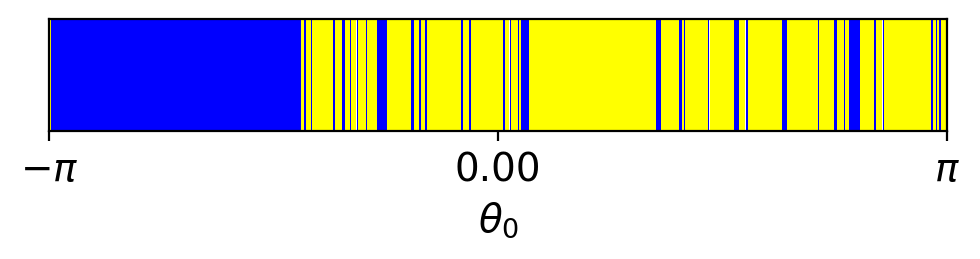

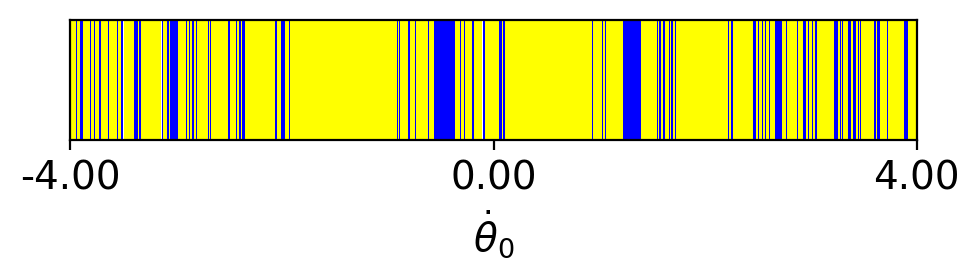

In [7]:
# θ-cut at fixed v0
x_vals, mask = visualise_basin_cut_numba(
    f=1.195, v_cut=True, v_value=0.0, npts=1000, fig_size=(5,1.4)
)

# v-cut at fixed θ0
x_vals, mask = visualise_basin_cut_numba(
    f=1.195, v_cut=False, theta_value=0, npts=1000
)


## Computing the fractal dimension

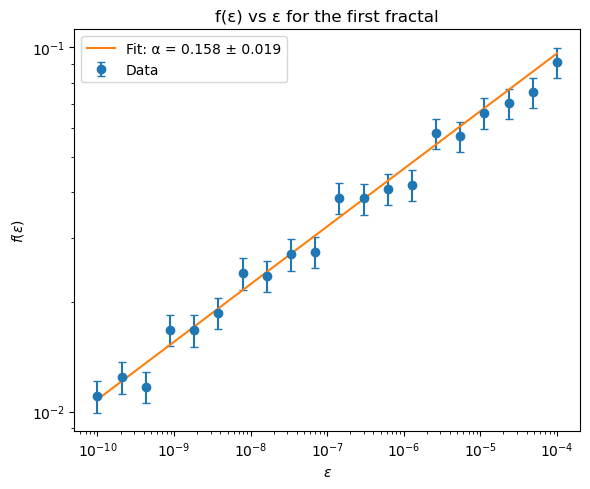

In [8]:
import multiprocessing
n_cores = multiprocessing.cpu_count()
alpha = uncertainty_algorithm_1D(
    threshold=100,
    min_eps=1e-10,
    max_eps=1e-4,
    f=1.195,
    n_jobs=-1, # can use up to n_cores
    verbose=True,
    fit_truncation_order=-6,
    divisor=100  
)

Plot the uncertainty exponent versus the forcing

Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [09:06<00:00, 27.30s/it]


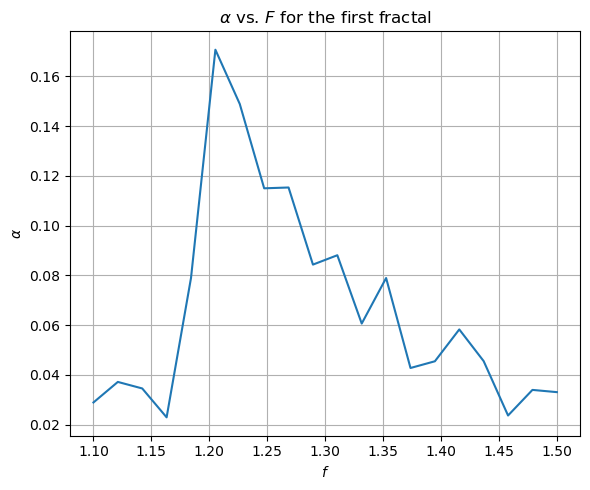

In [9]:
alpha_vs_F(fmin = 1.1, fmax = 1.5, npts = 20, threshold=100, 
           min_eps=1e-10, max_eps=1e-6, n_jobs=-1, verbose=False)

# Fractal 2
Plot the drift of the fixed point vs. the forcing

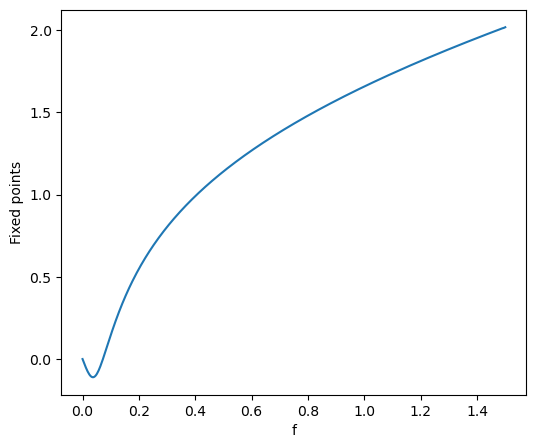

In [10]:
fixed_points = get_fixed_points_F(fmin = 0, fmax=1.5)

## Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


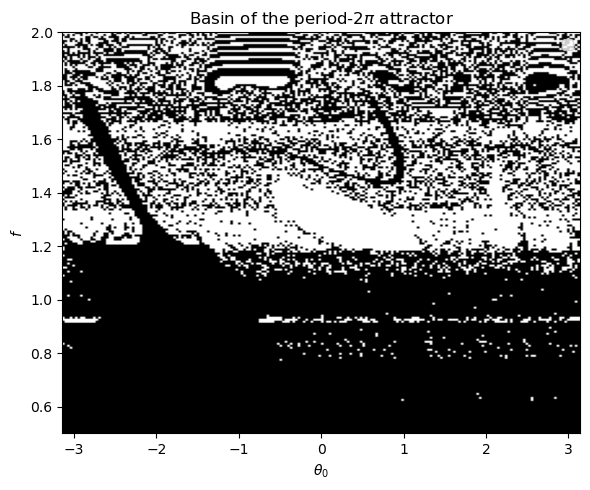

In [11]:
visualise_second_fractal_numba(fmin = 0.5, fmax=2, size=200, divisor=200, t_max=500.0, v0=0)

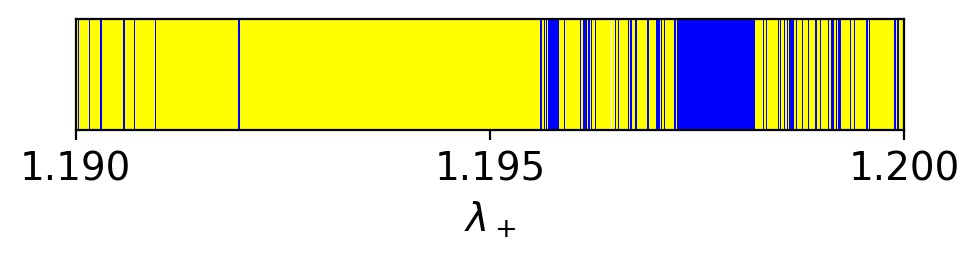

In [12]:
visualise_vertical_cut(fmin=1.19, fmax=1.2, theta0=0, v0=0, npts=1000, fig_size=(5,1.4))

## Computing the fractal dimension

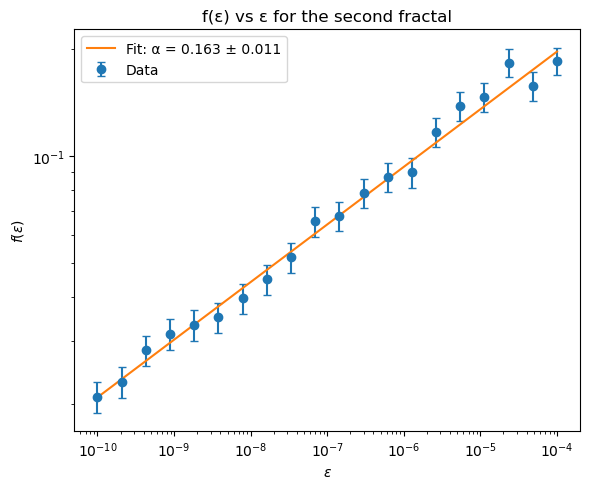

0.16270891569404733

In [13]:
uncertainty_algorithm_F(theta0=0, v0=0, min_eps=1e-10, max_eps=1e-4, threshold=100, fmin = 1.19, fmax = 1.2, n_jobs=-1, fit_truncation_order=-6)

# Fractal 3
## Visualisation

0.0405040504050405 13.244824482448244


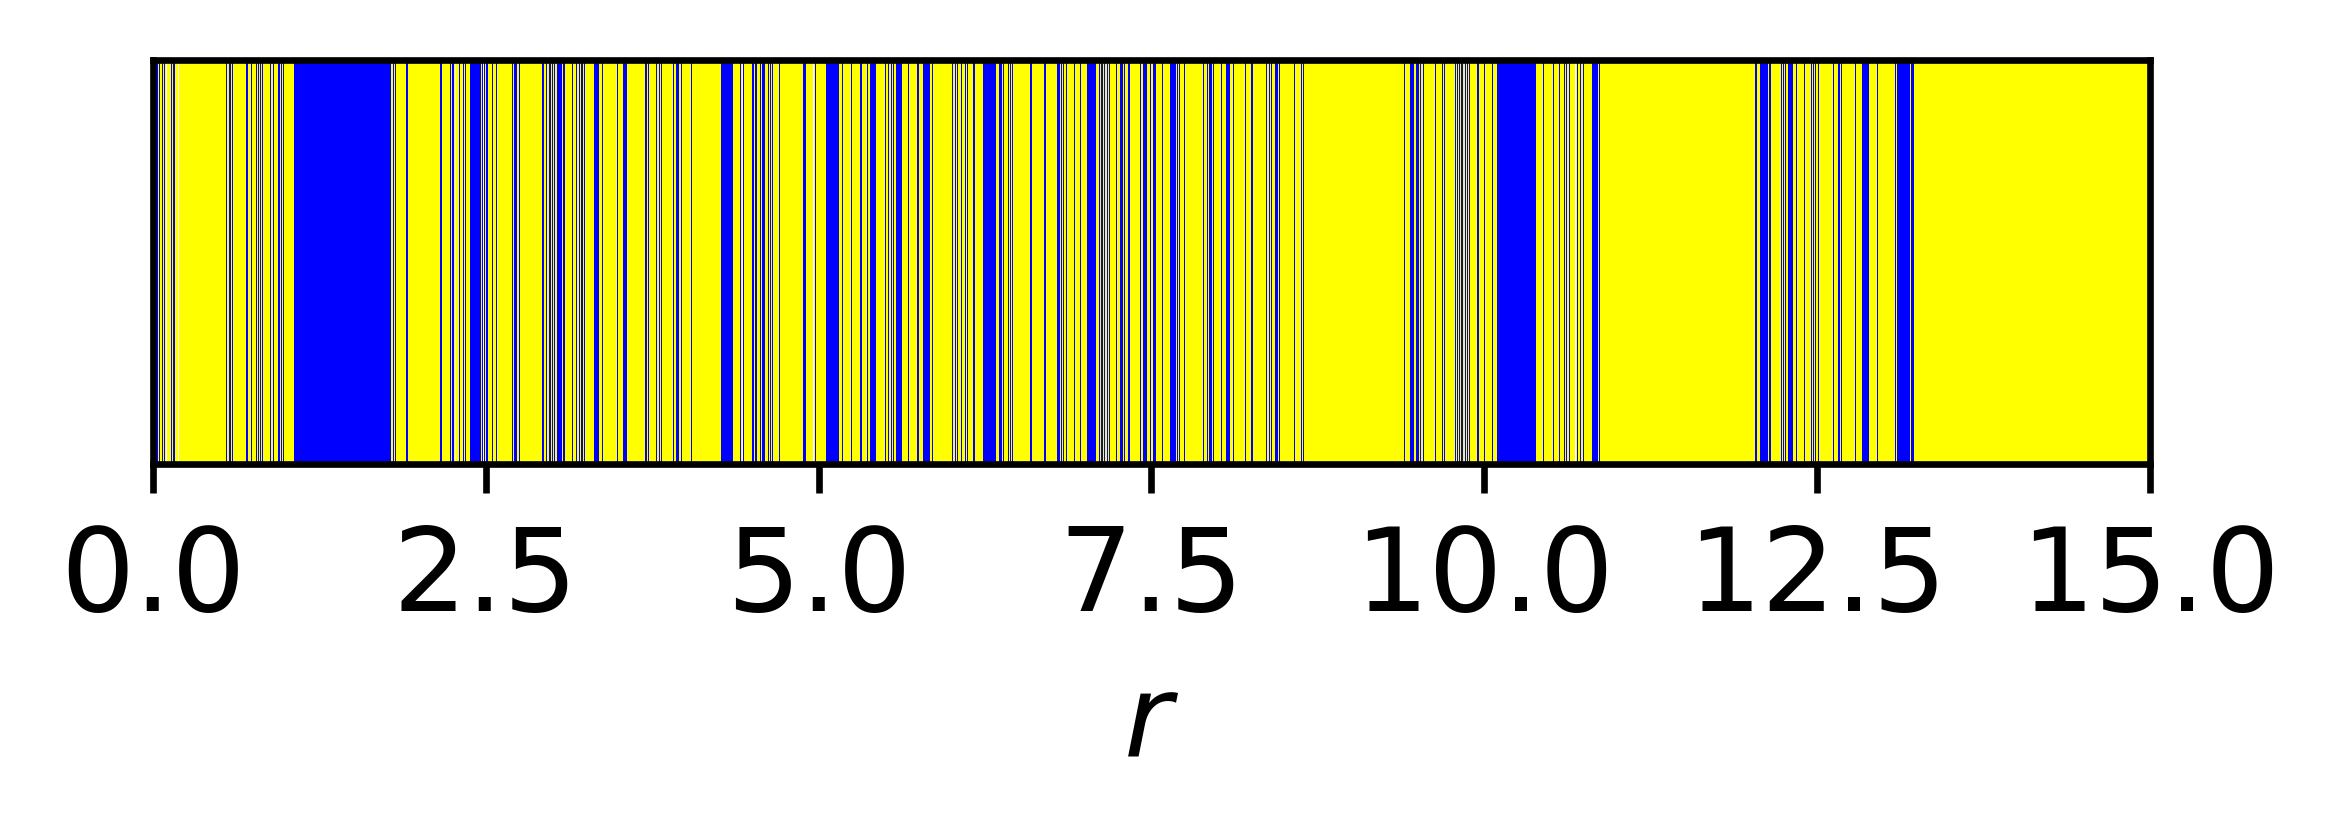

In [14]:
f0=0
theta0 = 0
v0 = 0
f_final = 1.195
rate_min = 0
rate_max = 15

divisor = 1000
t_eval = np.arange(0, 2000, np.pi/divisor)

thetas, theta_dots = solve_pendulum(
    theta0=theta0,
    v0=v0,
    t_eval=t_eval,
    nu=0.1,
    omega=1.0,
    f=f_final,
    plot=False
)

if (not (is_periodic_numba(pi_fraction=divisor, thetas = thetas))):
    visualise_third_fractal(rate_min = rate_min, rate_max = rate_max, npts = 10000, f0 = f0, f_final = f_final,
                             theta0=theta0, v0=v0, divisor = 200, settling_time=1000, large_rate_limit=1, large_rate_multiple=1e4,
                             fig_size=(4,1.5), dpi=600)
else:
    print('The fractal has infinite length')

## Computing the fractal dimension

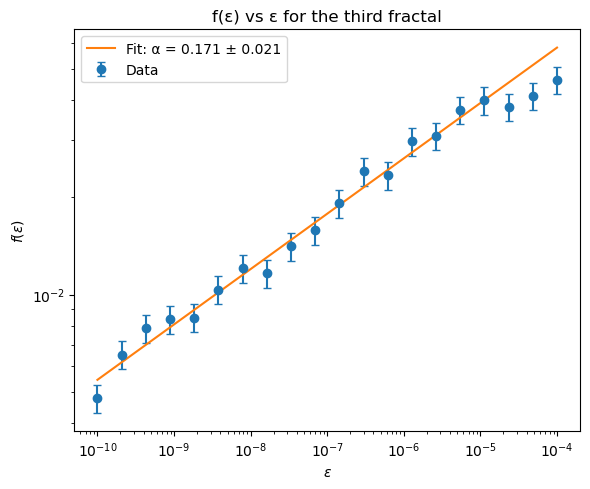

In [15]:
_ = uncertainty_algorithm_rate(theta0=0, v0=0, min_eps=1e-10, max_eps=1e-4, threshold=100, n_jobs=-1, large_rate_multiple=1e4,
                        rate_min = 0, rate_max = 15, f0=0, f_final = 1.195, divisor=200, fit_truncation_order=-6)

# The combined fit
Reproducing Figure 7(c)

In [ ]:
colors = ["tab:blue", "tab:orange", "tab:green"]   # or any colors you prefer
fontsize = 14
min_eps = 1e-10
max_eps = 1e-4
fit_truncation = -6
threshold = 150
f = 1.195
rate_max = 15
divisor = 300

plt.figure(figsize=(6, 6.8), dpi=600)

# ------------------ FRACTAL 1 ------------------
col = colors[0]

epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_1D(
    divisor=divisor,
    threshold=threshold,
    min_eps=min_eps,
    max_eps=max_eps,
    f=f,
    n_jobs=-1, 
    verbose=True, plot=False,
    fix_v=False, theta = 0, return_all_info=True, fit_truncation_order=fit_truncation
)

plt.errorbar(
    epsilons, feps,
    yerr=feps_err,
    fmt='o', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 1: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, fit_line, color=col)

print('Finished fractal 1')
# ------------------ FRACTAL 2 ------------------
col = colors[1]
f_range = 0.01

epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_F(theta0=0, v0=0, divisor=divisor,
                min_eps=min_eps, max_eps=max_eps, threshold=threshold, fmin = f-f_range, fmax = f + f_range, n_jobs=-1,
                return_all_info=True, plot=False, fit_truncation_order=fit_truncation)

plt.errorbar(
    epsilons, feps,
    yerr=feps_err,
    fmt='s', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 2: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, fit_line, color=col)
print('Finished fractal 2')

# ------------------ FRACTAL 3 ------------------
col = colors[2]

epsilons, feps, feps_err, fit_line, slope, confid_int = uncertainty_algorithm_rate(theta0=0, v0=0, min_eps=min_eps, 
                                                        max_eps=max_eps, threshold=threshold, n_jobs=-1, rate_min = 0, 
                                                        rate_max = rate_max, f0=0, f_final = f, return_all_info=True, plot=False,
                                                        divisor=divisor, large_rate_multiple=1e4, fit_truncation_order=fit_truncation)

plt.errorbar(
    epsilons, feps,
    yerr=feps_err,
    fmt='^', capsize=3,
    color=col, ecolor=col,
    label=f'Fractal 3: α = {slope:.3f} ± {confid_int:.3f}'
)
plt.loglog(epsilons, fit_line, color=col)

# ------------------ Formatting ------------------
plt.xlabel('ε', fontsize=fontsize)
plt.ylabel('f(ε)', fontsize=fontsize)
plt.legend(fontsize=fontsize, loc = 'upper left')
plt.ylim([10**-2.5, 1])
#plt.tight_layout()
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

# The animation

In [ ]:
divisor = 500
max_time = 300
t_eval = np.arange(0, max_time, np.pi/divisor)

run_with_gui_backend(
    func = animate_pendulum,
    theta0=-2, v0=0,
    t_eval=t_eval,
    nu=0.1, omega=1.0, f=1.2,
    speed=1, # speed of animation
    trail=0, # trail length
    delay = 0, # Delay between frames in milliseconds.
    show_strobe = True # show stroboscopic points
)

### With drift

In [ ]:
divisor = 1000
t_eval = np.arange(0, 1000, np.pi/divisor)

run_with_gui_backend(
    func = animate_pendulum_with_drift,
    theta0=0, v0=0, f0 = 0, f_final = 1.195,
    t_eval=t_eval,
    divisor = divisor,
    fps=60,
    speed=10,
    trail=0,
    delay = 0,
    show_strobe = False,
    rate = 0.01
    )